In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("C:\\Users\\DHRUBAJIT\\Desktop\\Kaggle Datasets\\CreditcardFraud\\creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


    Count  Percentage
0  284315    0.998273
1     492    0.001727


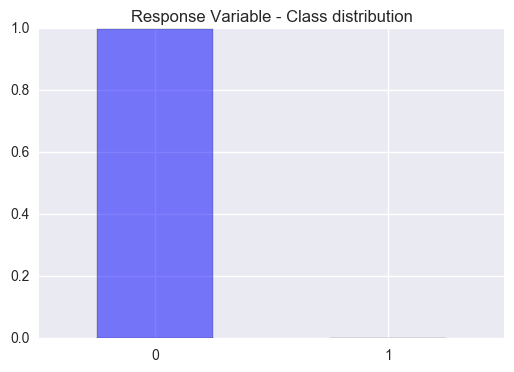

In [3]:
response_count = pd.DataFrame()
response_count['Count'] = data.Class.value_counts()
response_count['Percentage'] = response_count.apply(lambda x: x/x.sum())
print(response_count)
response_count['Percentage'].plot(kind='bar', color='blue', alpha=0.5, rot=0)
plt.title("Response Variable - Class distribution")

In [4]:
X = data.drop(['Time','Class'], axis=1)
y = data['Class']

In [5]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y, random_state=0, test_size=0.3)

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
def validation_cross(model, x,y,xtest,ytest):
    model.fit(x, y)

    #Predict training set:
    pred = model.predict(xtest)

    #Perform cross-validation:
    cv_score = cross_val_score(model, x, y, cv=5, scoring='accuracy')
    cv_score = np.sqrt(np.abs(cv_score))
    
    print ("Classification Report...")
    print (classification_report(ytest,pred))
    cm = confusion_matrix(ytest,pred)
    plt.figure(figsize = [6,3])
    print ("Confusion Matrix..")
    sns.heatmap(cm, annot=True, fmt="d")
    plt.ylabel("Real value")
    plt.xlabel("Predicted value")

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain_new = sc.fit_transform(xtrain)
xtest_new = sc.transform(xtest)

### Baseline model

Classification Report...
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85296
          1       0.88      0.62      0.73       147

avg / total       1.00      1.00      1.00     85443

Confusion Matrix..


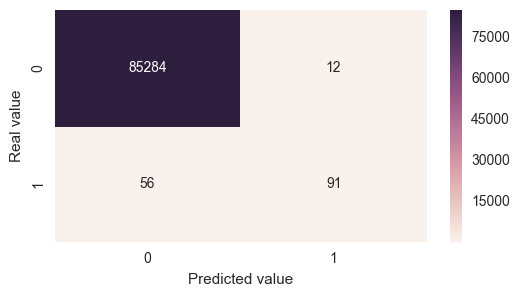

In [10]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
validation_cross(lr,xtrain_new,ytrain,xtest_new,ytest)

### Solve for Imbalanced Dataset

In [9]:
ytrain.value_counts()

0    199019
1       345
Name: Class, dtype: int64

#### Under-sampling

In [25]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

ros = RandomUnderSampler(ratio={0:19902}, random_state=0)
X_undersample, y_undersample = ros.fit_sample(xtrain_new,ytrain)
print(Counter(y_undersample)) 

Counter({0: 19902, 1: 345})


Classification Report...
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85296
          1       0.81      0.80      0.81       147

avg / total       1.00      1.00      1.00     85443

Confusion Matrix..


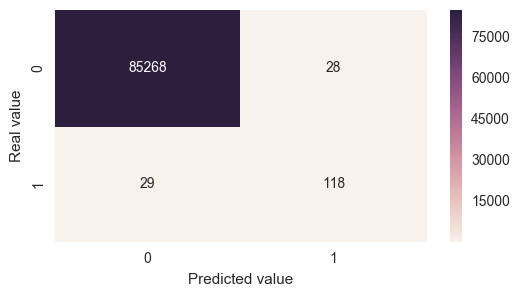

In [11]:
validation_cross(lr,X_undersample,y_undersample,xtest_new,ytest)

#### Over-sampling

#### Random over-sampler

In [8]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
ros = RandomOverSampler(ratio={1:3450}, random_state=0)
X_oversamp, y_oversamp = ros.fit_sample(xtrain_new,ytrain)
print(Counter(y_oversamp))

Counter({0: 199019, 1: 3450})


Classification Report...
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85296
          1       0.82      0.81      0.82       147

avg / total       1.00      1.00      1.00     85443

Confusion Matrix..


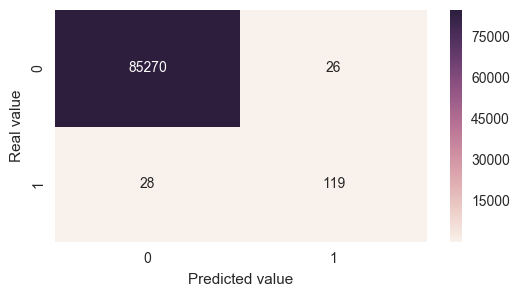

In [11]:
validation_cross(lr,X_oversamp,y_oversamp,xtest_new,ytest)

#### SMOTE

In [14]:
from imblearn.over_sampling import SMOTE, ADASYN
X_smote, y_smote = SMOTE(ratio={1:3450}).fit_sample(xtrain_new, ytrain)
print(Counter(y_smote))

Counter({0: 199019, 1: 3450})


Classification Report...
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85296
          1       0.81      0.80      0.81       147

avg / total       1.00      1.00      1.00     85443

Confusion Matrix..


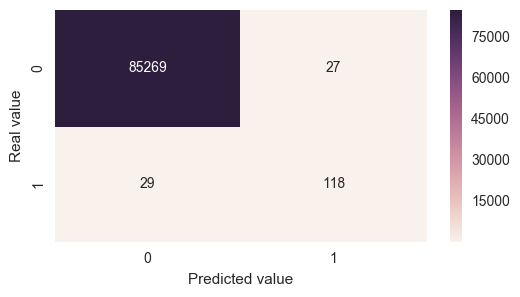

In [15]:
validation_cross(lr,X_smote,y_smote,xtest_new,ytest)

#### ADASYN

In [16]:
X_adasyn, y_adasyn = ADASYN(ratio={1:3450}).fit_sample(xtrain_new, ytrain)
print(Counter(y_adasyn))

Counter({0: 199019, 1: 3468})


Classification Report...
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85296
          1       0.71      0.82      0.76       147

avg / total       1.00      1.00      1.00     85443

Confusion Matrix..


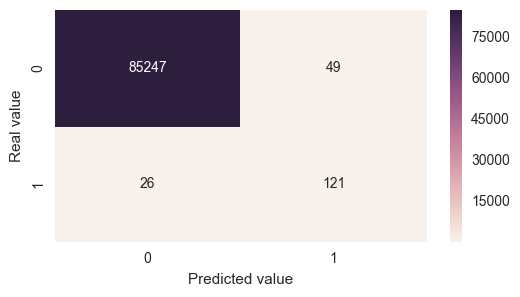

In [17]:
validation_cross(lr,X_adasyn,y_adasyn,xtest_new,ytest)

#### ROC curves

In [26]:
from sklearn import metrics
clf = LogisticRegression()
clf.fit(X_undersample,y_undersample)
preds = clf.predict_proba(xtest_new)[:,1]
fpr, tpr, _ = metrics.roc_curve(ytest, preds)
area = metrics.auc(fpr,tpr)

In [27]:
clf1 = LogisticRegression()
clf1.fit(X_oversamp,y_oversamp)
preds1 = clf1.predict_proba(xtest_new)[:,1]
fpr1, tpr1, _ = metrics.roc_curve(ytest, preds1)
area1 = metrics.auc(fpr1,tpr1)

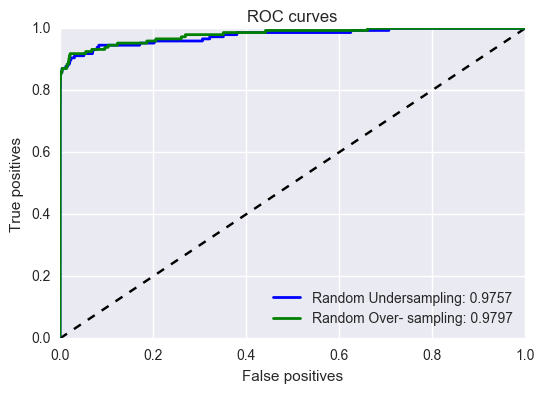

In [28]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, color='b', linewidth=2, label='Random Undersampling: %.4f' %(area))
plt.plot(fpr1, tpr1, color='g', linewidth=2, label='Random Over- sampling: %.4f' %(area1))
plt.title("ROC curves")
plt.legend(loc = 'lower right')
plt.xlabel("False positives")
plt.ylabel("True positives")

### Model Selection

#### SGDClassifier

C:\Users\DHRUBAJIT\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Classification Report...
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85296
          1       0.71      0.82      0.76       147

avg / total       1.00      1.00      1.00     85443

Confusion Matrix..


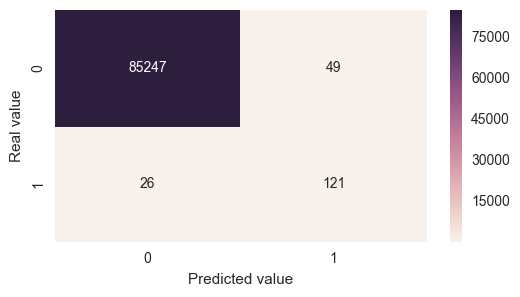

In [12]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
validation_cross(sgd,X_oversamp,y_oversamp,xtest_new,ytest)

#### RandomForestClassifier

Classification Report...
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85296
          1       0.93      0.79      0.85       147

avg / total       1.00      1.00      1.00     85443

Confusion Matrix..


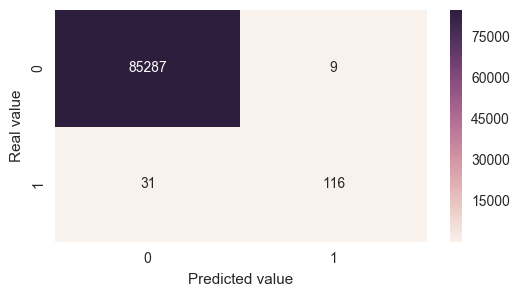

In [14]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
validation_cross(rfc,X_oversamp,y_oversamp,xtest_new,ytest)

#### GradientBoostingClassifier

Classification Report...
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85296
          1       0.80      0.80      0.80       147

avg / total       1.00      1.00      1.00     85443

Confusion Matrix..


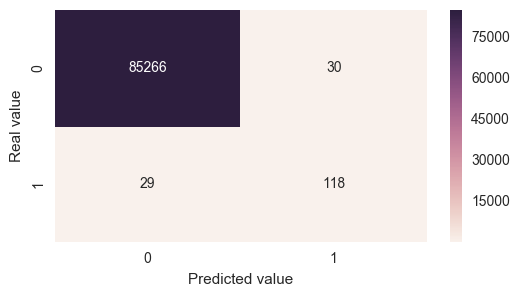

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
validation_cross(gbc,X_oversamp,y_oversamp,xtest_new,ytest)

#### XGBoost

Classification Report...
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85296
          1       0.82      0.81      0.82       147

avg / total       1.00      1.00      1.00     85443

Confusion Matrix..


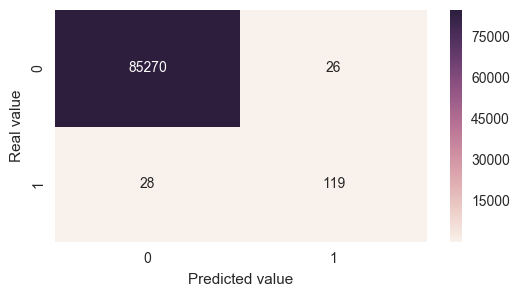

In [9]:
import os

mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-7.2.0-posix-seh-rt_v5-rev0\\mingw64\\bin'

os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

from xgboost import XGBClassifier
xgb = XGBClassifier()
validation_cross(xgb,X_oversamp,y_oversamp,xtest_new,ytest)

#### ROC curves

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
clf = LogisticRegression()
clf.fit(X_oversamp,y_oversamp)
preds = clf.predict_proba(xtest_new)[:,1]
fpr, tpr, _ = metrics.roc_curve(ytest, preds)
area = metrics.auc(fpr,tpr)

In [14]:
clf1 = XGBClassifier()
clf1.fit(X_oversamp,y_oversamp)
preds1 = clf1.predict_proba(xtest_new)[:,1]
fpr1, tpr1, _ = metrics.roc_curve(ytest, preds1)
area1 = metrics.auc(fpr1,tpr1)

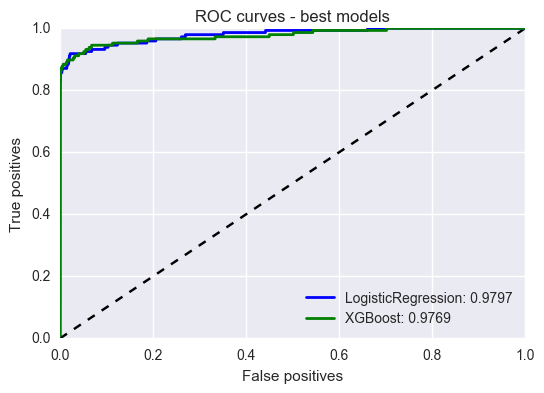

In [15]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, color='b', linewidth=2, label='LogisticRegression: %.4f' %(area))
plt.plot(fpr1, tpr1, color='g', linewidth=2, label='XGBoost: %.4f' %(area1))
plt.title("ROC curves - best models")
plt.legend(loc = 'lower right')
plt.xlabel("False positives")
plt.ylabel("True positives")

### Feature Selection

In [10]:
def feature_select(feat_select_model, model):
    feat_select_model.fit(X, y)
    X_new = feat_select_model.transform(X)
    print("Original number of features : %d" %X.shape[1])
    print("Selected number of features : %d" %X_new.shape[1])  
    xtrain,xtest,ytrain,ytest = train_test_split(X_new,y, random_state=0, test_size=0.3)
    xtrain_new = sc.fit_transform(xtrain)
    xtest_new = sc.transform(xtest)
    X_oversamp, y_oversamp = ros.fit_sample(xtrain_new,ytrain)
    print("")
    print("Number of transactions per class:")
    print(Counter(y_oversamp))
    
    model.fit(X_oversamp,y_oversamp)

    #Predict training set:
    pred = model.predict(xtest_new)

    #Perform cross-validation:
    cv_score = cross_val_score(model, X_oversamp,y_oversamp, cv=5, scoring='accuracy')
    cv_score = np.sqrt(np.abs(cv_score))
    
    print ("Classification Report...")
    print (classification_report(ytest,pred))
    cm = confusion_matrix(ytest,pred)
    plt.figure(figsize = [6,3])
    print ("Confusion Matrix..")
    sns.heatmap(cm, annot=True, fmt="d")
    plt.ylabel("Real value")
    plt.xlabel("Predicted value")

#### RFE

#### RFE with XGBoost

Original number of features : 29
Selected number of features : 14

Number of transactions per class:
Counter({0: 199019, 1: 3450})
Classification Report...
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85296
          1       0.84      0.82      0.83       147

avg / total       1.00      1.00      1.00     85443

Confusion Matrix..


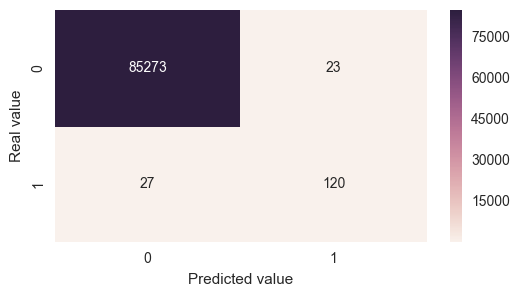

In [11]:
from sklearn.feature_selection import RFE
rfe = RFE(xgb)

feature_select(rfe,xgb)

#### RFE with LogisticRegression

Original number of features : 29
Selected number of features : 14

Number of transactions per class:
Counter({0: 199019, 1: 3450})
Classification Report...
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85296
          1       0.84      0.80      0.82       147

avg / total       1.00      1.00      1.00     85443

Confusion Matrix..


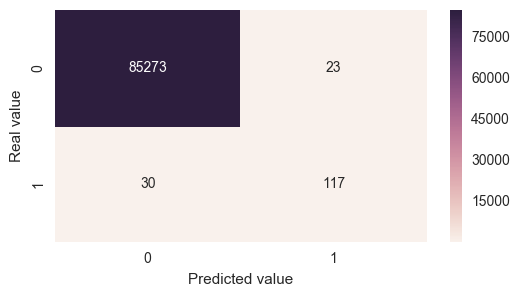

In [17]:
from sklearn.feature_selection import RFE
rfe = RFE(clf)

feature_select(rfe,clf)

#### weights-based

#### with XGBoost

Original number of features : 29
Selected number of features : 10

Number of transactions per class:
Counter({0: 199019, 1: 3450})
Classification Report...
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85296
          1       0.82      0.82      0.82       147

avg / total       1.00      1.00      1.00     85443

Confusion Matrix..


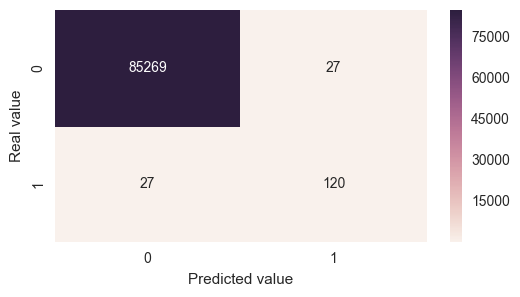

In [16]:
from sklearn.feature_selection import SelectFromModel
xgb.fit(X_oversamp, y_oversamp)
weights_based = SelectFromModel(xgb, prefit=False)

feature_select(weights_based, xgb)

#### with LogisticRegression

Original number of features : 29
Selected number of features : 10

Number of transactions per class:
Counter({0: 199019, 1: 3450})
Classification Report...
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85296
          1       0.78      0.79      0.78       147

avg / total       1.00      1.00      1.00     85443

Confusion Matrix..


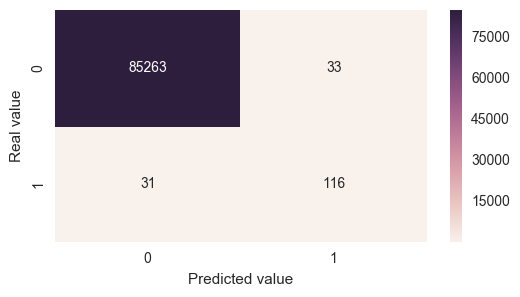

In [18]:
from sklearn.feature_selection import SelectFromModel
clf.fit(X_oversamp, y_oversamp)
weights_based = SelectFromModel(clf, prefit=False)

feature_select(weights_based, clf)

#### VarianceThreshold

#### with XGBoost

Original number of features : 29
Selected number of features : 23

Number of transactions per class:
Counter({0: 199019, 1: 3450})
Classification Report...
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85296
          1       0.82      0.82      0.82       147

avg / total       1.00      1.00      1.00     85443

Confusion Matrix..


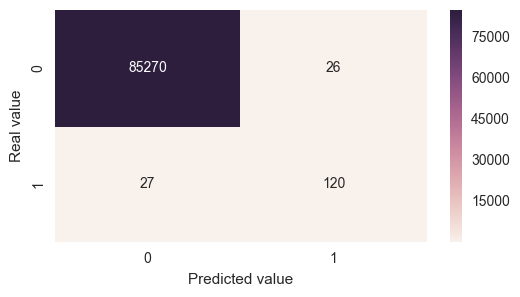

In [17]:
from sklearn.feature_selection import VarianceThreshold
v_thres = VarianceThreshold(threshold = 0.5)
v_thres.fit_transform(X_oversamp)

feature_select(v_thres, xgb)

#### with LogisticRegression

Original number of features : 29
Selected number of features : 23

Number of transactions per class:
Counter({0: 199019, 1: 3450})
Classification Report...
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85296
          1       0.82      0.81      0.82       147

avg / total       1.00      1.00      1.00     85443

Confusion Matrix..


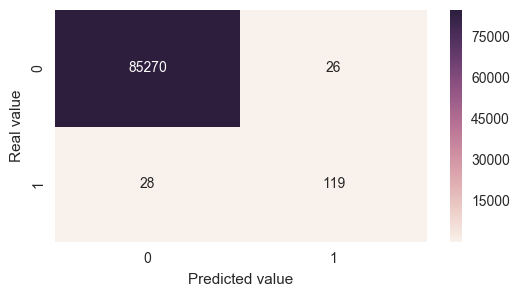

In [19]:
from sklearn.feature_selection import VarianceThreshold
v_thres = VarianceThreshold(threshold = 0.5)
v_thres.fit_transform(X_oversamp)

feature_select(v_thres, clf)

### Final Model 

In [39]:
from sklearn.metrics import accuracy_score
def feature_select1(feat_select_model, model):
    feat_select_model.fit(X, y)
    X_new = feat_select_model.transform(X)
    print("Original number of features : %d" %X.shape[1])
    print("Selected number of features : %d" %X_new.shape[1])  
    xtrain,xtest,ytrain,ytest = train_test_split(X_new,y, random_state=0, test_size=0.3)
    xtrain_new = sc.fit_transform(xtrain)
    xtest_new = sc.transform(xtest)
    X_oversamp, y_oversamp = ros.fit_sample(xtrain_new,ytrain)
    print("")
    print("Number of transactions per class:")
    print(Counter(y_oversamp))
    
    #Perform cross-validation:
    cv_score = cross_val_score(model, X_oversamp,y_oversamp, cv=5, scoring='accuracy')
    cv_score = np.sqrt(np.abs(cv_score))
    pred = model.predict(xtest_new)
    
    print("model report:")
    print("Mean Cross_validation score: %.4g" %(np.mean(cv_score)))
    print ("Accuracy_score : %.4g" %model.score(X_oversamp,y_oversamp))
    print("Testing accuracy: %.4g" %(accuracy_score(ytest, pred)))
    print ("Test RMSE      : %.4g" % np.sqrt(mean_squared_error(ytest, pred)))
    print("")
    
    preds = model.predict_proba(xtest)[:,1]
    fpr, tpr, _ = metrics.roc_curve(ytest, preds)
    area = metrics.auc(fpr,tpr)
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, color='b', linewidth=2, label='XGBoost with RFE: %.4f' %(area))
    plt.title("ROC curve - best model")
    plt.legend(loc = 'lower right')
    plt.xlabel("False positives")
    plt.ylabel("True positives")

Original number of features : 29
Selected number of features : 14

Number of transactions per class:
Counter({0: 19902, 1: 345})
model report:
Mean Cross_validation score: 0.9983
Accuracy_score : 0.9962
Testing accuracy: 0.9992
Test RMSE      : 0.02821



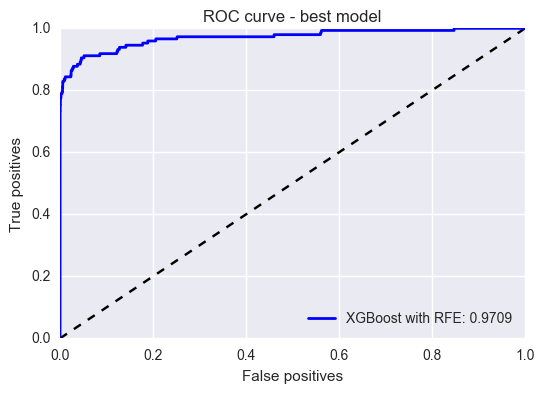

In [40]:
feature_select1(rfe, xgb)